# Etapa 6: Processamento Digital


**Objetivo:** Simular alguma modificação digital no sinal.


**Tarefas:**
* Aplicar transformações típicas de sistemas digitais de comunicação, como ruído artificial.
* Mostrar os efeitos visuais no gráfico do sinal digital.
* Gerar gráficos antes/depois do processamento.
* Explicar a transformação aplicada e o efeito obtido.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import random


## Recuperação do Sinal Digitalizado (Etapa 5)


In [3]:
# Parâmetros do sinal (consistente com Etapas Anteriores)
f_fundamental = 1  # Hz
T = 1 / f_fundamental # Período
amplitude = 1
n_ciclos_plot = 3 # Número de ciclos para plotagem

# Parâmetros de digitalização (da Etapa 5)
fs_escolhida = 20 # Hz - Frequência de amostragem
N_bits = 4 # Número de bits para quantização
L = 2**N_bits  # Número de níveis de quantização

# Tempo de amostragem
t_amostrado = np.arange(0, n_ciclos_plot * T, 1/fs_escolhida)
sinal_amostrado = amplitude * signal.square(2 * np.pi * f_fundamental * t_amostrado)

# Quantização (processo da Etapa 5)
sinal_normalizado = (sinal_amostrado + amplitude) / (2 * amplitude) # Normaliza para [0, 1]
niveis_quantizados_indices = np.round(sinal_normalizado * (L - 1)) # Mapeia para índices [0, L-1]
sinal_quantizado_normalizado = niveis_quantizados_indices / (L - 1) # Normaliza de volta para [0, 1]
sinal_digital_original = (sinal_quantizado_normalizado * (2 * amplitude)) - amplitude # Mapeia de volta para [-amplitude, +amplitude]

print(f"Sinal digital recuperado com {len(t_amostrado)} amostras")
print(f"Faixa de valores: [{np.min(sinal_digital_original):.3f}, {np.max(sinal_digital_original):.3f}]")


Sinal digital recuperado com 60 amostras
Faixa de valores: [-1.000, 1.000]


## Visualização do Sinal Digital Original


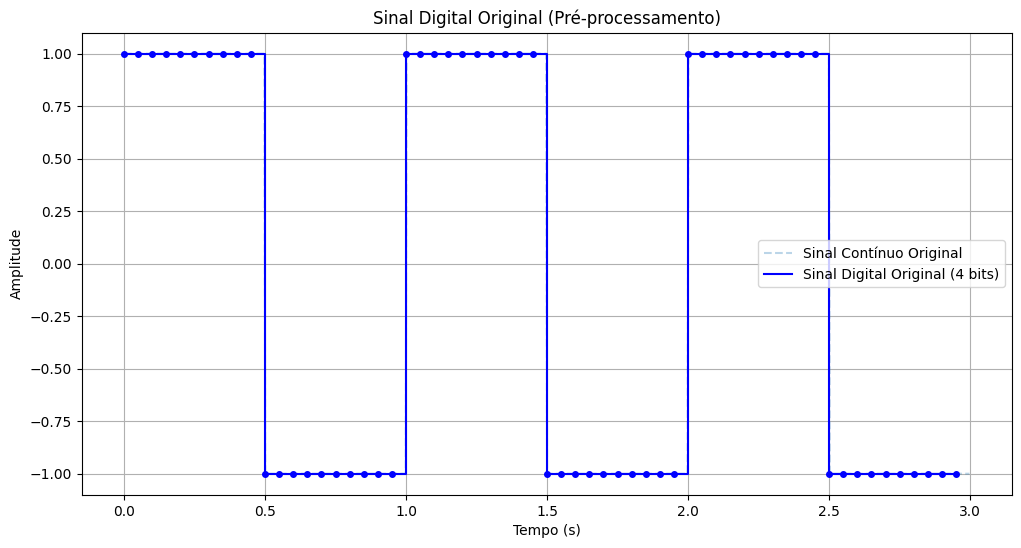

In [4]:
# Sinal contínuo de referência
t_continuo = np.linspace(0, n_ciclos_plot * T, 1000, endpoint=False)
onda_quadrada_continua = amplitude * signal.square(2 * np.pi * f_fundamental * t_continuo)

plt.figure(figsize=(12, 6))
plt.plot(t_continuo, onda_quadrada_continua, label='Sinal Contínuo Original', alpha=0.3, linestyle='--')
plt.step(t_amostrado, sinal_digital_original, where='post', color='blue', label=f'Sinal Digital Original ({N_bits} bits)')
plt.plot(t_amostrado, sinal_digital_original, marker='o', color='blue', linestyle='None', markersize=4)

plt.title('Sinal Digital Original (Pré-processamento)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


## 1. Adição de Ruído Gaussiano (AWGN - Additive White Gaussian Noise)


O ruído AWGN é uma das simulações mais comuns em sistemas digitais de comunicação. Simula interferências e ruídos presentes em canais de comunicação reais.

**Parâmetros do Ruído:**
* **SNR (Signal-to-Noise Ratio):** Relação sinal-ruído em dB
* **Potência do Sinal:** $P_s = \frac{1}{N} \sum_{n=0}^{N-1} s^2[n]$
* **Potência do Ruído:** $P_n = \frac{P_s}{10^{SNR/10}}$
* **Desvio Padrão do Ruído:** $\sigma_n = \sqrt{P_n}$


In [5]:
def adicionar_ruido_awgn(sinal, snr_db):
    """
    Adiciona ruído AWGN ao sinal digital
    
    Parâmetros:
    sinal: array do sinal original
    snr_db: SNR desejada em dB
    
    Retorna:
    sinal_com_ruido: sinal original + ruído
    ruido: apenas o ruído adicionado
    """
    # Calcular a potência do sinal
    potencia_sinal = np.mean(sinal**2)
    
    # Calcular a potência do ruído baseada na SNR
    snr_linear = 10**(snr_db/10)
    potencia_ruido = potencia_sinal / snr_linear
    
    # Gerar ruído gaussiano com a potência calculada
    sigma_ruido = np.sqrt(potencia_ruido)
    ruido = np.random.normal(0, sigma_ruido, len(sinal))
    
    # Adicionar ruído ao sinal
    sinal_com_ruido = sinal + ruido
    
    return sinal_com_ruido, ruido

# Definir diferentes níveis de SNR para demonstração
snr_levels = [20, 10, 5]  # dB

# Aplicar ruído para cada nível de SNR
sinais_com_ruido = {}
ruidos = {}

for snr in snr_levels:
    sinal_ruidoso, ruido = adicionar_ruido_awgn(sinal_digital_original, snr)
    sinais_com_ruido[snr] = sinal_ruidoso
    ruidos[snr] = ruido
    
    print(f"SNR = {snr} dB:")
    print(f"  Potência do sinal: {np.mean(sinal_digital_original**2):.4f}")
    print(f"  Potência do ruído: {np.mean(ruido**2):.4f}")
    print(f"  SNR real: {10*np.log10(np.mean(sinal_digital_original**2)/np.mean(ruido**2)):.2f} dB")
    print()


SNR = 20 dB:
  Potência do sinal: 1.0000
  Potência do ruído: 0.0126
  SNR real: 18.99 dB

SNR = 10 dB:
  Potência do sinal: 1.0000
  Potência do ruído: 0.1059
  SNR real: 9.75 dB

SNR = 5 dB:
  Potência do sinal: 1.0000
  Potência do ruído: 0.2953
  SNR real: 5.30 dB



## Visualização dos Efeitos do Ruído


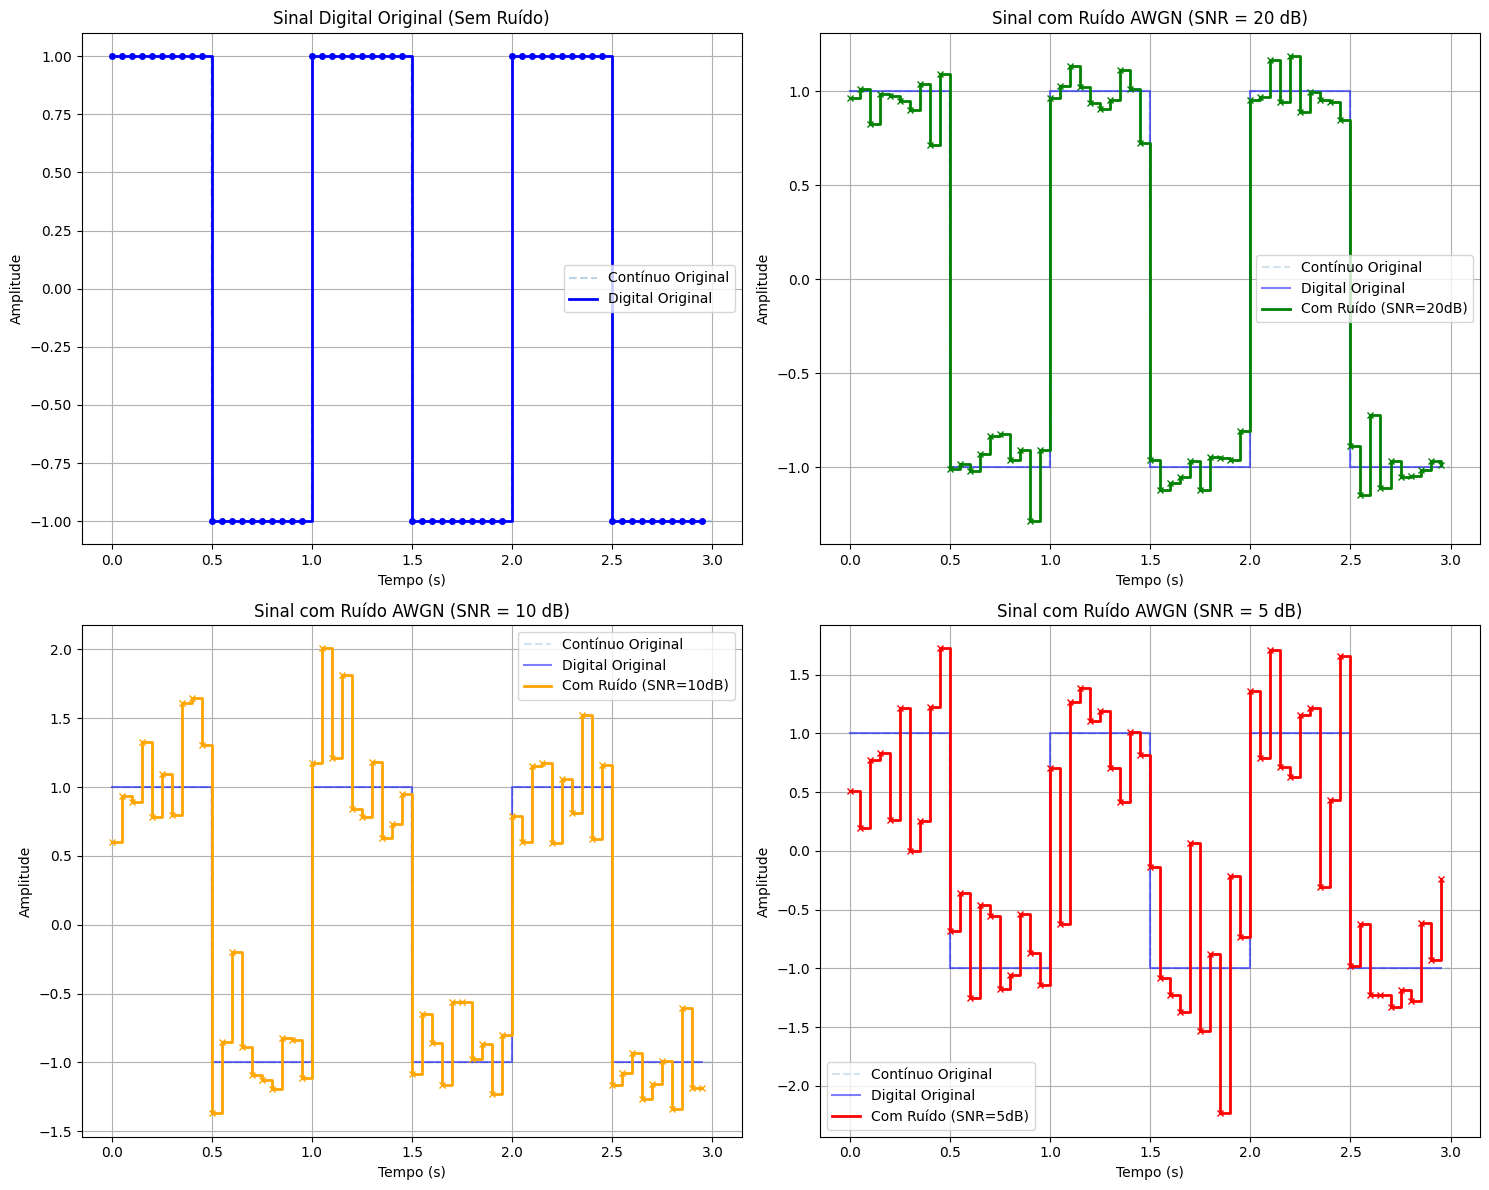

In [6]:
plt.figure(figsize=(15, 12))

# Sinal original
plt.subplot(2, 2, 1)
plt.plot(t_continuo, onda_quadrada_continua, label='Contínuo Original', alpha=0.3, linestyle='--')
plt.step(t_amostrado, sinal_digital_original, where='post', color='blue', label='Digital Original', linewidth=2)
plt.plot(t_amostrado, sinal_digital_original, marker='o', color='blue', linestyle='None', markersize=4)
plt.title('Sinal Digital Original (Sem Ruído)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Sinais com diferentes níveis de ruído
colors = ['green', 'orange', 'red']
for i, snr in enumerate(snr_levels):
    plt.subplot(2, 2, i+2)
    plt.plot(t_continuo, onda_quadrada_continua, label='Contínuo Original', alpha=0.2, linestyle='--')
    plt.step(t_amostrado, sinal_digital_original, where='post', color='blue', alpha=0.5, label='Digital Original')
    plt.step(t_amostrado, sinais_com_ruido[snr], where='post', color=colors[i], label=f'Com Ruído (SNR={snr}dB)', linewidth=2)
    plt.plot(t_amostrado, sinais_com_ruido[snr], marker='x', color=colors[i], linestyle='None', markersize=4)
    
    plt.title(f'Sinal com Ruído AWGN (SNR = {snr} dB)')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## 2. Distorção por Saturação (Clipping)


A saturação ou clipping ocorre quando o sinal excede os limites dinâmicos do sistema. É comum em amplificadores e conversores A/D quando há sobrecarga.


In [7]:
def aplicar_clipping(sinal, limite_superior, limite_inferior=None):
    """
    Aplica saturação (clipping) ao sinal
    
    Parâmetros:
    sinal: array do sinal original
    limite_superior: valor máximo permitido
    limite_inferior: valor mínimo permitido (se None, usa -limite_superior)
    
    Retorna:
    sinal_clipped: sinal com saturação aplicada
    """
    if limite_inferior is None:
        limite_inferior = -limite_superior
    
    sinal_clipped = np.clip(sinal, limite_inferior, limite_superior)
    return sinal_clipped

# Aplicar clipping com diferentes níveis
# Primeiro, vamos usar o sinal com ruído moderado (SNR = 10 dB)
sinal_base = sinais_com_ruido[10]

# Diferentes níveis de clipping
clip_levels = [0.8, 0.6, 0.4]  # Como fração da amplitude máxima
sinais_clipped = {}

for clip_level in clip_levels:
    limite = clip_level * amplitude
    sinal_clipped = aplicar_clipping(sinal_base, limite)
    sinais_clipped[clip_level] = sinal_clipped
    
    # Calcular percentual de amostras saturadas
    amostras_saturadas = np.sum((np.abs(sinal_clipped) >= limite - 1e-10))
    percentual_saturado = (amostras_saturadas / len(sinal_clipped)) * 100
    
    print(f"Clipping em ±{limite:.2f}: {percentual_saturado:.1f}% das amostras saturadas")


Clipping em ±0.80: 75.0% das amostras saturadas
Clipping em ±0.60: 90.0% das amostras saturadas
Clipping em ±0.40: 98.3% das amostras saturadas


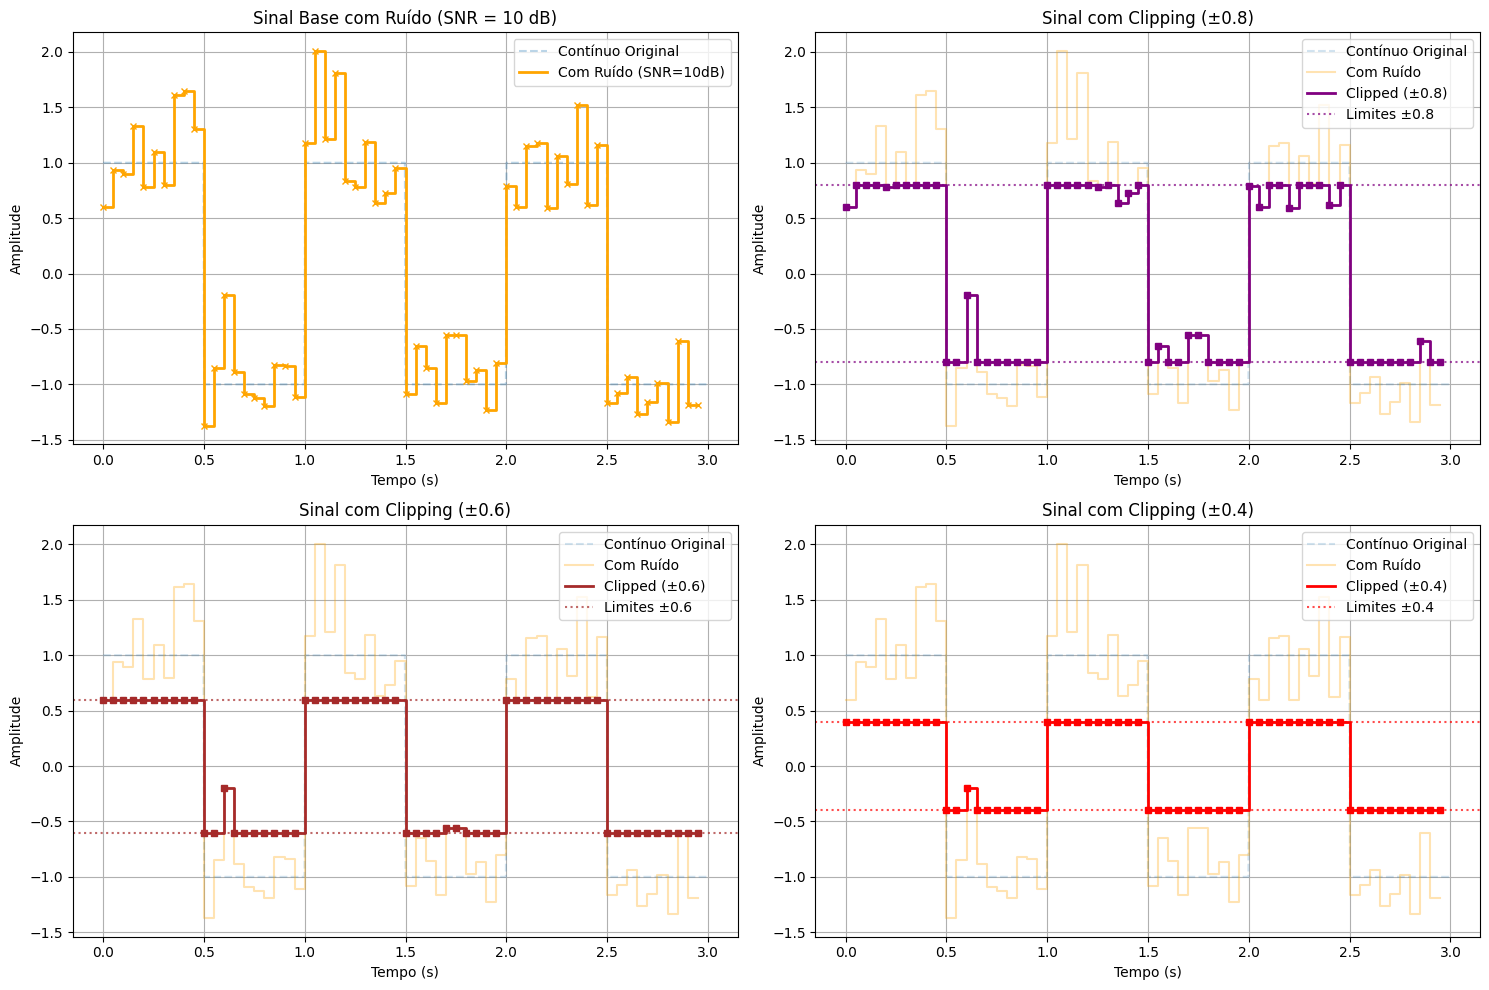

In [8]:
plt.figure(figsize=(15, 10))

# Sinal com ruído (base para clipping)
plt.subplot(2, 2, 1)
plt.plot(t_continuo, onda_quadrada_continua, label='Contínuo Original', alpha=0.3, linestyle='--')
plt.step(t_amostrado, sinal_base, where='post', color='orange', label='Com Ruído (SNR=10dB)', linewidth=2)
plt.plot(t_amostrado, sinal_base, marker='x', color='orange', linestyle='None', markersize=4)
plt.title('Sinal Base com Ruído (SNR = 10 dB)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Sinais com diferentes níveis de clipping
colors = ['purple', 'brown', 'red']
for i, clip_level in enumerate(clip_levels):
    plt.subplot(2, 2, i+2)
    limite = clip_level * amplitude
    
    plt.plot(t_continuo, onda_quadrada_continua, label='Contínuo Original', alpha=0.2, linestyle='--')
    plt.step(t_amostrado, sinal_base, where='post', color='orange', alpha=0.3, label='Com Ruído')
    plt.step(t_amostrado, sinais_clipped[clip_level], where='post', color=colors[i], label=f'Clipped (±{limite:.1f})', linewidth=2)
    plt.plot(t_amostrado, sinais_clipped[clip_level], marker='s', color=colors[i], linestyle='None', markersize=4)
    
    # Mostrar os limites de clipping
    plt.axhline(y=limite, color=colors[i], linestyle=':', alpha=0.7, label=f'Limites ±{limite:.1f}')
    plt.axhline(y=-limite, color=colors[i], linestyle=':', alpha=0.7)
    
    plt.title(f'Sinal com Clipping (±{limite:.1f})')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## 3. Processamento Combinado: Ruído + Clipping


Em sistemas reais, múltiplos efeitos podem ocorrer simultaneamente. Vamos simular um cenário onde o sinal sofre ruído e depois saturação.


In [9]:
# Processo combinado: Ruído + Clipping
# 1. Adicionar ruído moderado
sinal_com_ruido_moderado, _ = adicionar_ruido_awgn(sinal_digital_original, 8)  # SNR = 8 dB

# 2. Aplicar clipping
sinal_processado_final = aplicar_clipping(sinal_com_ruido_moderado, 0.7)

# Análise das distorções
print("Análise do Processamento Combinado:")
print(f"Sinal Original - Média: {np.mean(sinal_digital_original):.4f}, RMS: {np.sqrt(np.mean(sinal_digital_original**2)):.4f}")
print(f"Após Ruído   - Média: {np.mean(sinal_com_ruido_moderado):.4f}, RMS: {np.sqrt(np.mean(sinal_com_ruido_moderado**2)):.4f}")
print(f"Após Clipping - Média: {np.mean(sinal_processado_final):.4f}, RMS: {np.sqrt(np.mean(sinal_processado_final**2)):.4f}")

# Calcular distorção total
erro_quadratico_medio = np.mean((sinal_processado_final - sinal_digital_original)**2)
print(f"\nErro Quadrático Médio total: {erro_quadratico_medio:.4f}")


Análise do Processamento Combinado:
Sinal Original - Média: 0.0000, RMS: 1.0000
Após Ruído   - Média: 0.0089, RMS: 1.1058
Após Clipping - Média: -0.0044, RMS: 0.6647

Erro Quadrático Médio total: 0.1277


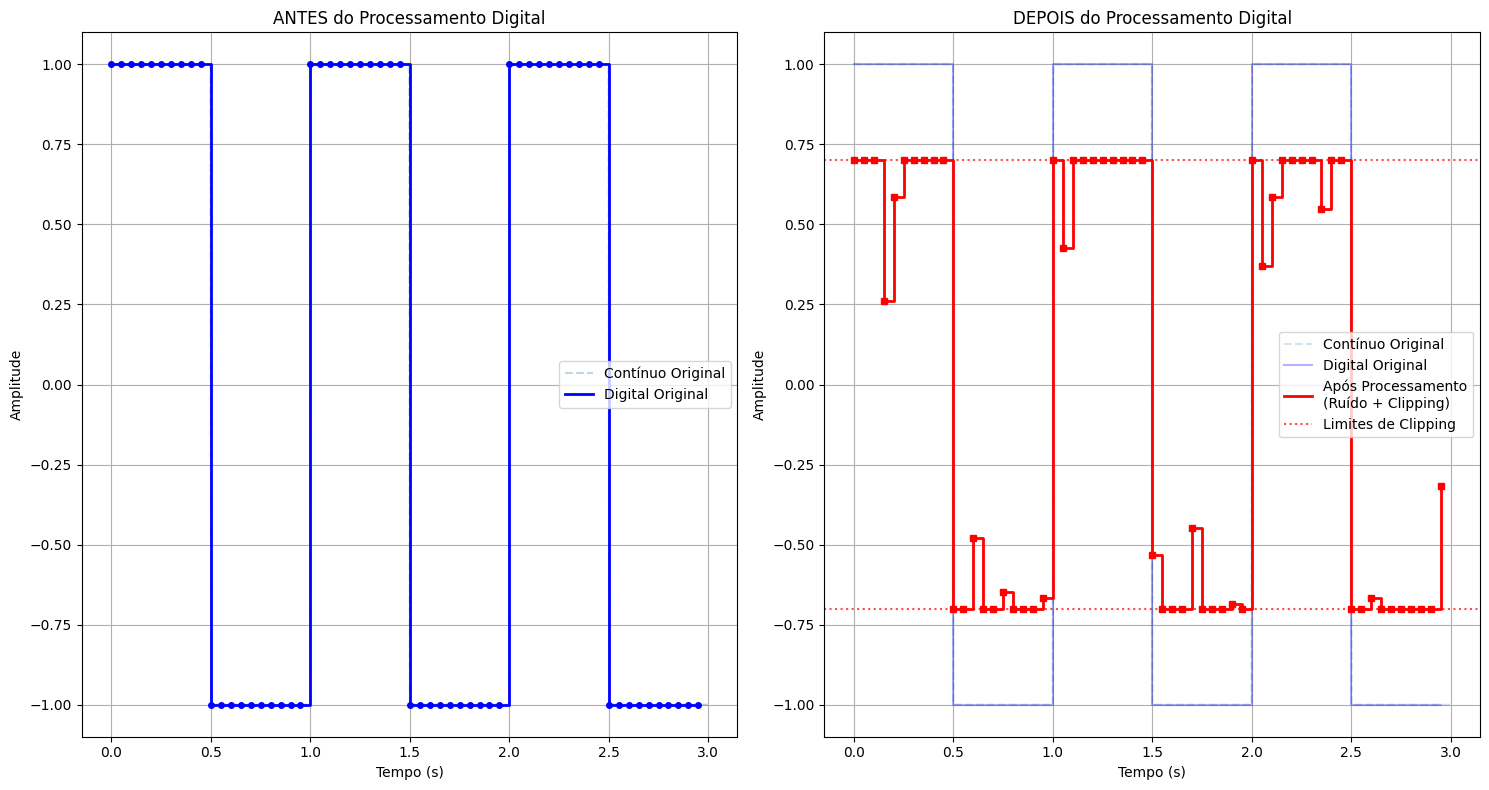

In [10]:
plt.figure(figsize=(15, 8))

# Comparação: Antes e Depois do processamento
plt.subplot(1, 2, 1)
plt.plot(t_continuo, onda_quadrada_continua, label='Contínuo Original', alpha=0.3, linestyle='--')
plt.step(t_amostrado, sinal_digital_original, where='post', color='blue', label='Digital Original', linewidth=2)
plt.plot(t_amostrado, sinal_digital_original, marker='o', color='blue', linestyle='None', markersize=4)
plt.title('ANTES do Processamento Digital')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_continuo, onda_quadrada_continua, label='Contínuo Original', alpha=0.2, linestyle='--')
plt.step(t_amostrado, sinal_digital_original, where='post', color='blue', alpha=0.3, label='Digital Original')
plt.step(t_amostrado, sinal_processado_final, where='post', color='red', label='Após Processamento\n(Ruído + Clipping)', linewidth=2)
plt.plot(t_amostrado, sinal_processado_final, marker='s', color='red', linestyle='None', markersize=4)

# Mostrar limites de clipping
plt.axhline(y=0.7, color='red', linestyle=':', alpha=0.7, label='Limites de Clipping')
plt.axhline(y=-0.7, color='red', linestyle=':', alpha=0.7)

plt.title('DEPOIS do Processamento Digital')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Análise dos Efeitos do Processamento Digital


### 1. Ruído AWGN (Additive White Gaussian Noise):

**Efeitos Observados:**
* **Degradação da SNR:** À medida que a SNR diminui (mais ruído), o sinal fica mais "sujo" e menos definido.
* **Perda de Precisão:** As transições nítidas da onda quadrada ficam menos distintas.
* **Aumento da Variância:** O sinal apresenta flutuações aleatórias em torno dos valores ideais.

**Impacto no Sistema:**
* Em SNR baixa (5 dB), a forma original da onda quadrada fica significativamente mascarada.
* O ruído afeta uniformemente todas as amostras do sinal.
* A detecção e decodificação do sinal tornam-se mais difíceis.

### 2. Saturação (Clipping):

**Efeitos Observados:**
* **Distorção Não-Linear:** Ao contrário do ruído, o clipping introduce distorções que dependem da amplitude do sinal.
* **Perda de Informação:** Amostras que excedem os limites são "cortadas", perdendo informação permanentemente.
* **Harmônicas Espúrias:** A saturação introduz componentes de frequência que não estavam presentes no sinal original.

**Impacto no Sistema:**
* Clipping severo (±0.4) destrói significativamente a forma de onda.
* A saturação afeta principalmente os picos do sinal.
* Diferentemente do ruído, o clipping é determinístico e irreversível.

### 3. Processamento Combinado:

**Efeitos Observados:**
* **Degradação Acumulativa:** Os efeitos do ruído e clipping se somam, resultando em maior distorção total.
* **Mascaramento:** O ruído pode mascarar alguns efeitos do clipping e vice-versa.
* **Perda de Fidelidade:** O sinal final tem baixa correlação com o sinal original.

**Relevância Prática:**
* Simula condições realistas de sistemas de comunicação digital.
* Demonstra a importância do controle de ganho e filtragem.
* Ilustra como múltiplas imperfeições podem degradar significativamente a qualidade do sinal.


## Preparação para a Próxima Etapa


In [11]:
# Salvar o sinal processado para usar na próxima etapa (Filtragem Digital)
print("Sinal processado pronto para a Etapa 7 - Filtragem Digital")
print(f"Características do sinal processado:")
print(f"- Número de amostras: {len(sinal_processado_final)}")
print(f"- Taxa de amostragem: {fs_escolhida} Hz")
print(f"- Faixa de amplitude: [{np.min(sinal_processado_final):.3f}, {np.max(sinal_processado_final):.3f}]")
print(f"- Transformações aplicadas: Ruído AWGN (SNR=8dB) + Clipping (±0.7)")

# Este sinal (sinal_processado_final) será usado como entrada para a Etapa 7


Sinal processado pronto para a Etapa 7 - Filtragem Digital
Características do sinal processado:
- Número de amostras: 60
- Taxa de amostragem: 20 Hz
- Faixa de amplitude: [-0.700, 0.700]
- Transformações aplicadas: Ruído AWGN (SNR=8dB) + Clipping (±0.7)
